In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('ggplot')

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.utils.viz import *

In [24]:
df = pd.read_csv("./data/clean_entire_corpus.csv")
df['keyword'] = df['keyword'].fillna('_')
df.head()

,id,keyword,text,target,source,clean_text
0,1,_,Our Deeds are the Reason of this #earthquake M...,1,train,our deeds are the reason of this earthquake ma...
1,4,_,Forest fire near La Ronge Sask. Canada,1,train,forest fire near la ronge sask canada
2,5,_,All residents asked to 'shelter in place' are ...,1,train,all residents asked to ishelter in place are b...
3,6,_,"13,000 people receive #wildfires evacuation or...",1,train,people receive wildfires evacuation orders in...
4,7,_,Just got sent this photo from Ruby #Alaska as ...,1,train,just got sent this photo from ruby alaska as s...


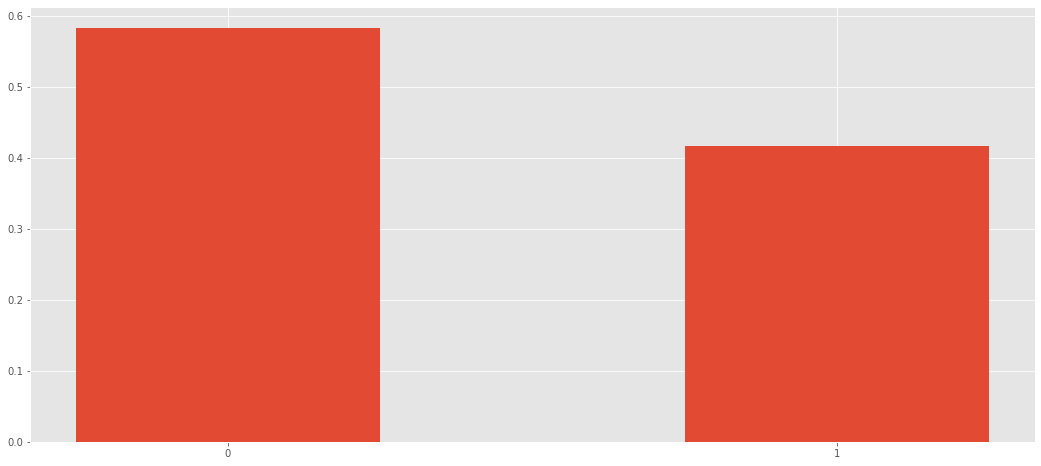

In [25]:
plt.figure(figsize=(18, 8))
ax = df['target'].hist(density=True, rwidth=0.5, bins=np.arange(3)-0.5)
ax.set_xticks([0, 1])

* 57% of tweets are labelled as 0 (non-disaster)
* 43% of tweets are labelled as 1 (disaster)

## Tweets length

In [26]:
df['length'] = df['clean_text'].apply(lambda r: len(r.split(' ')))

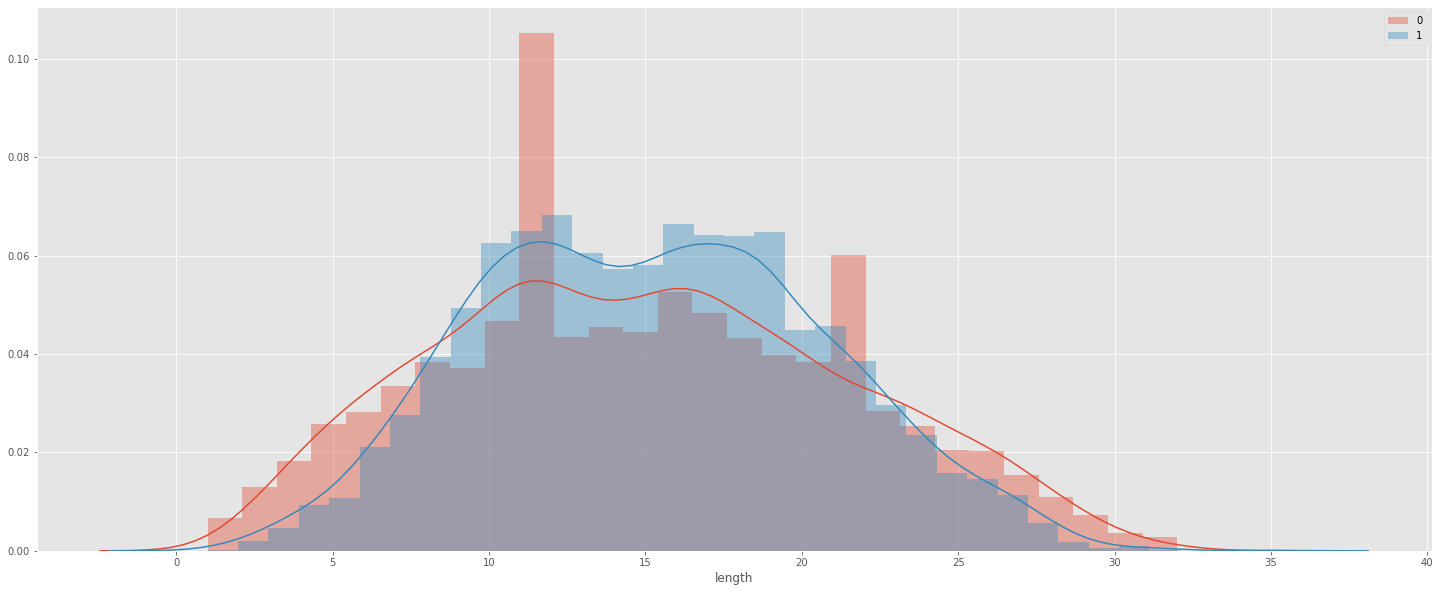

In [27]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.distplot(df[df['target'] == 0]['length'], label='0')
sns.distplot(df[df['target'] == 1]['length'], label='1')
plt.legend()

* Real disaster tweets usually have a length of 10-20 words.
* Very short/long tweet tends to be fake disaster tweets.

## Vocabulary

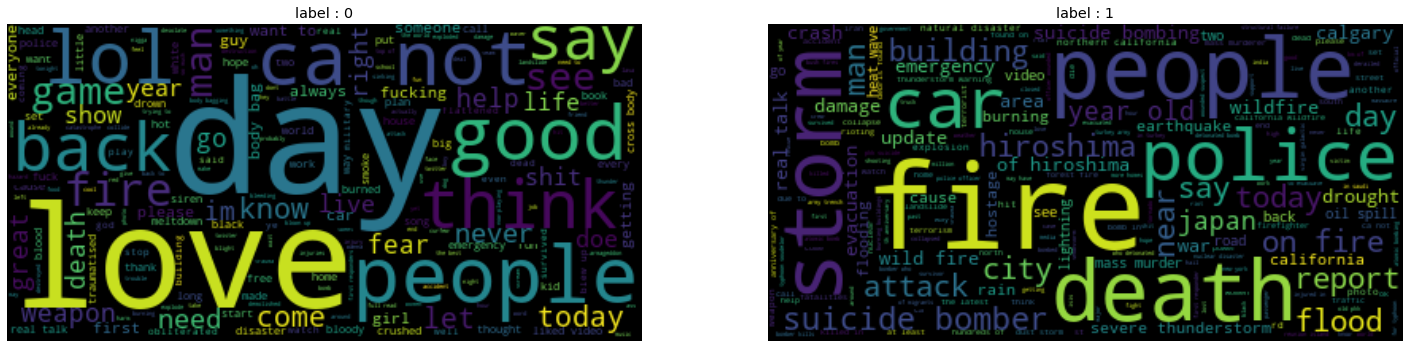

In [28]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, axs = plt.subplots(1, 2, figsize=(25, 7))
labels = [0, 1]
stop_words = STOPWORDS.union(['thi', 'new', 'wa', 'ha', 'via', 'one', 'got', 'still', 'now', 'us',
                              'thing', 'will', 'hi', 'really', 'going', 'rt', 'time', 'the'])

for i, label in enumerate(labels):
    corpus = df[df['target'] == label]['clean_text']
    text = ' '.join(corpus)
    
    ax = axs[i]
    wordcloud = WordCloud(stopwords=stop_words).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'label : {label}')

* Read disaster tweets tend to deal with catastrophes and negative events (death, storm, flood, bomber...)
* Non-disaster tweets uses more common and positive words (love, people, day, good...)

### Unigram

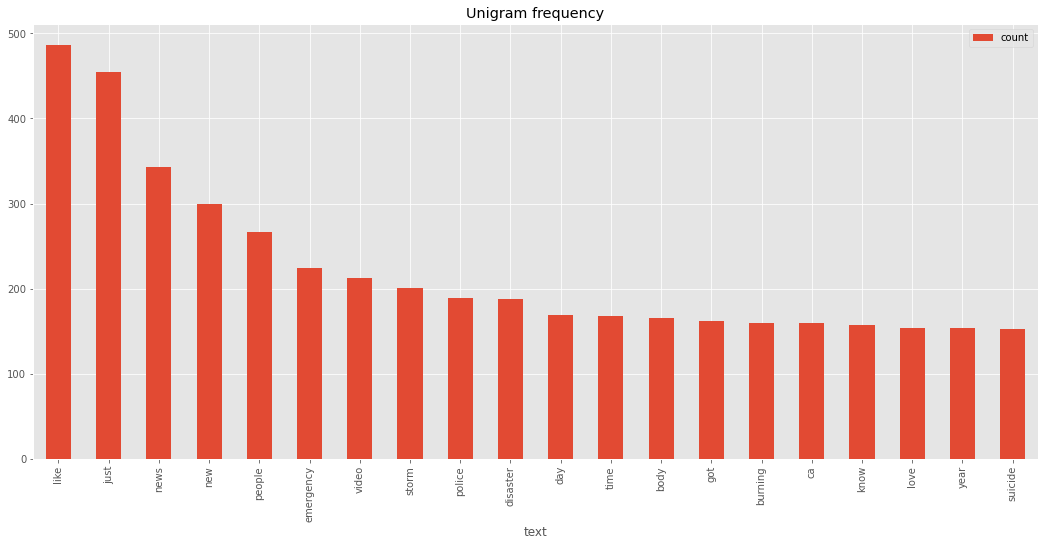

In [29]:
top_grams = get_top_grams(df['clean_text'], 20)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

df1 = pd.DataFrame(top_grams, columns = ['text' , 'count'])
df1['count'] = df1['count'].astype(float)
df1.plot(x='text', y='count', kind='bar', ax=ax, title='Unigram frequency')

### Bigram

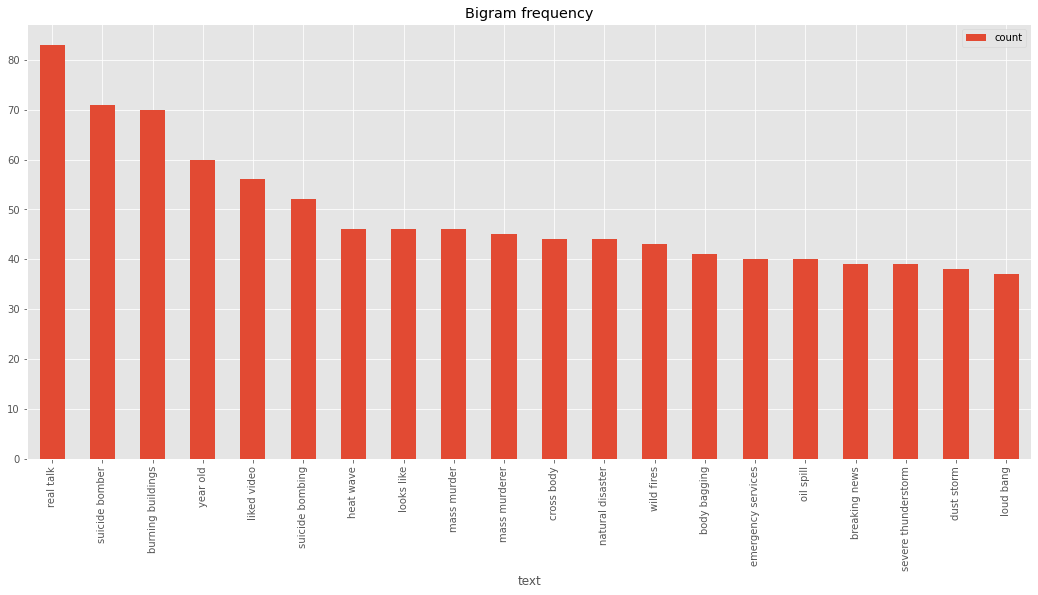

In [42]:
top_grams = get_top_grams(df['clean_text'], 20, gram=2)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

df1 = pd.DataFrame(top_grams, columns = ['text' , 'count'])
df1['count'] = df1['count'].astype(float)
df1.plot(x='text', y='count', kind='bar', ax=ax, title='Bigram frequency')

### Trigram

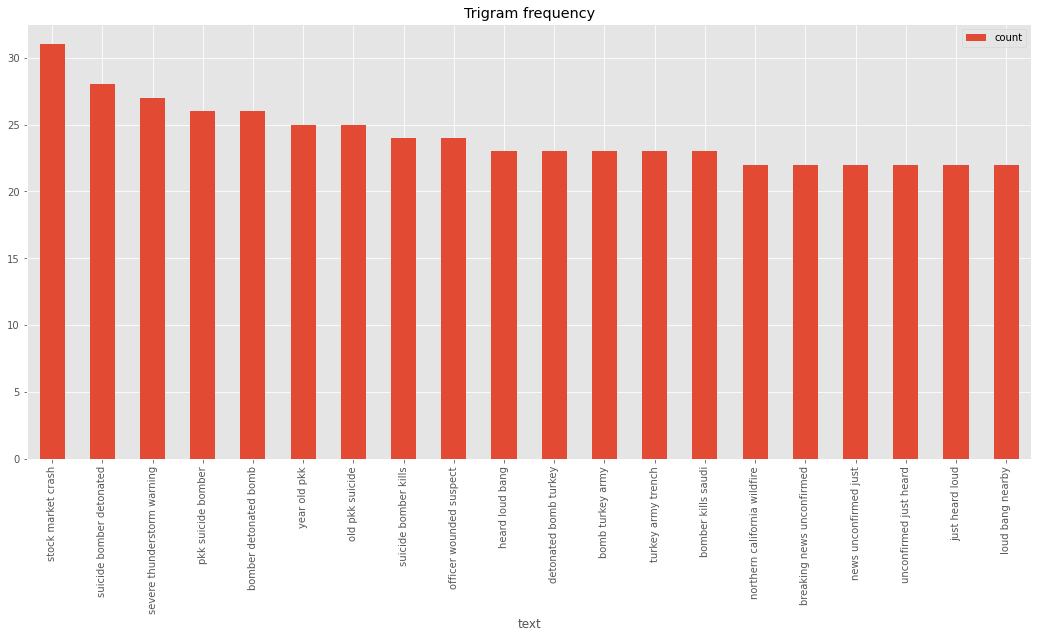

In [43]:
top_grams = get_top_grams(df['clean_text'], 20, gram=3)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

df1 = pd.DataFrame(top_grams, columns = ['text' , 'count'])
df1['count'] = df1['count'].astype(float)
df1.plot(x='text', y='count', kind='bar', ax=ax, title='Trigram frequency')

## Keywords

In [32]:
keywords = df['keyword'].unique()
print(len(keywords))
keywords

222


array(['_', 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

* There are composed words : burning%20buildings, bush%20fires...

**How many tweets use these words ?**

In [33]:
keyed_df = df[df['keyword'] != '_'].copy()
keyed_df['use_keywords'] = keyed_df.apply(lambda r: 1 if len(set(r['keyword'].split('%20')).intersection(r['text'].split(' '))) > 0 else 0, axis=1)

Text(0.5, 1.0, 'Test set')

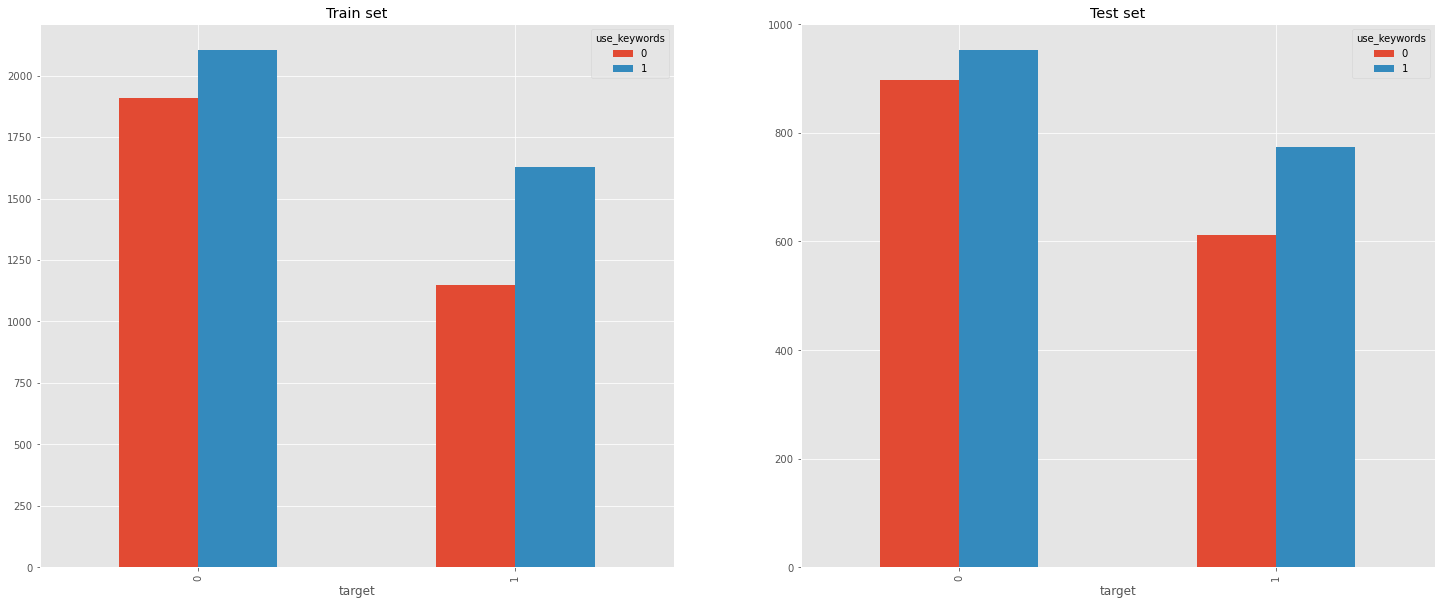

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

sub_df = keyed_df[keyed_df['source'] == 'train']
v = pd.crosstab(sub_df['target'], sub_df['use_keywords'])
ax = axs[0]
v.plot.bar(ax=ax)
ax.set_title('Train set')

sub_df = keyed_df[keyed_df['source'] == 'test']
v = pd.crosstab(sub_df['target'], sub_df['use_keywords'])
ax = axs[1]
v.plot.bar(ax=ax)
ax.set_title('Test set')

* No difference between train & test sets
* Tweets usually use the keyword
* Non-disaster tweets has a higher proportion than disaster tweets concerning the non-use of keywords

**How many tweets per keywords ?**

In [35]:
df.groupby('keyword').count()['text']

keyword
_                      76
ablaze                 49
accident               50
aftershock             43
airplane%20accident    46
                       ..
wounded                45
wounds                 50
wreck                  50
wreckage               27
wrecked                50
Name: text, Length: 222, dtype: int64

* Seems like data contains 50 tweets for almost each keywords
* There are 87 tweets without keywords

In [36]:
(df.shape[0] - 87) / 222

45.11711711711712

**Looking at an example**

In [37]:
keyword = 'storm'
subdf = df[df['keyword'] == keyword]
print(subdf.shape)
subdf.head(10)

(50, 7)


,id,keyword,text,target,source,clean_text,length
5619,8942,storm,FINALLY a storm,0,train,finally a storm,3
5620,8944,storm,#gamefeed Warcraft 3-Inspired Mode Likely Hitt...,0,train,game feed warcraft inspired mode likely hitti...,22
5621,8945,storm,Typhoon Soudelor was captured in this incredib...,1,train,typhoon soudelor was captured in this incredib...,16
5622,8946,storm,So this storm just came out of no where. .fuck...,1,train,so this storm just came out of no where fuck m...,13
5623,8947,storm,omfg.... I just woke up again....,0,train,omfg i just woke up again,7
5624,8948,storm,New on Ebay UK Star Wars Storm Trooper Pop! Vi...,0,train,new on ebay uk star wars storm trooper pop vin...,16
5625,8949,storm,How to prepare your #property for a #storm:\n\...,1,train,how to prepare your property for a storm,9
5626,8952,storm,kesabaran membuahkan hasil indah pada saat tep...,1,train,kesabaran membuahkan hasil indah pada saat tep...,27
5627,8953,storm,@Jenniferarri_ comeeeee! ...but why is it bout...,1,train,come but why is it bout to storm tho,10
5628,8955,storm,RT @tonyhsieh: 'The person who dances with you...,0,train,rt the person who dances with you in the rain ...,20


**Labels per keywords**

In [38]:
def proportion_disaster(df):
    return df.sum() / df.shape[0]

grouped_df_train = df[df['source'] == 'train'].groupby('keyword').agg({'target': proportion_disaster})
grouped_df_test = df[df['source'] == 'test'].groupby('keyword').agg({'target': proportion_disaster})

grouped_df = pd.DataFrame()
grouped_df['keyword'] = grouped_df_train.index
grouped_df['train'] = grouped_df_train.values
grouped_df['test'] = grouped_df_test.values

grouped_df

,keyword,train,test
0,_,0.620000,0.615385
1,ablaze,0.371429,0.142857
2,accident,0.685714,0.266667
3,aftershock,0.000000,0.125000
4,airplane%20accident,0.838710,0.866667
...,...,...,...
217,wounded,0.656250,0.846154
218,wounds,0.303030,0.294118
219,wreck,0.189189,0.153846
220,wreckage,1.000000,1.000000


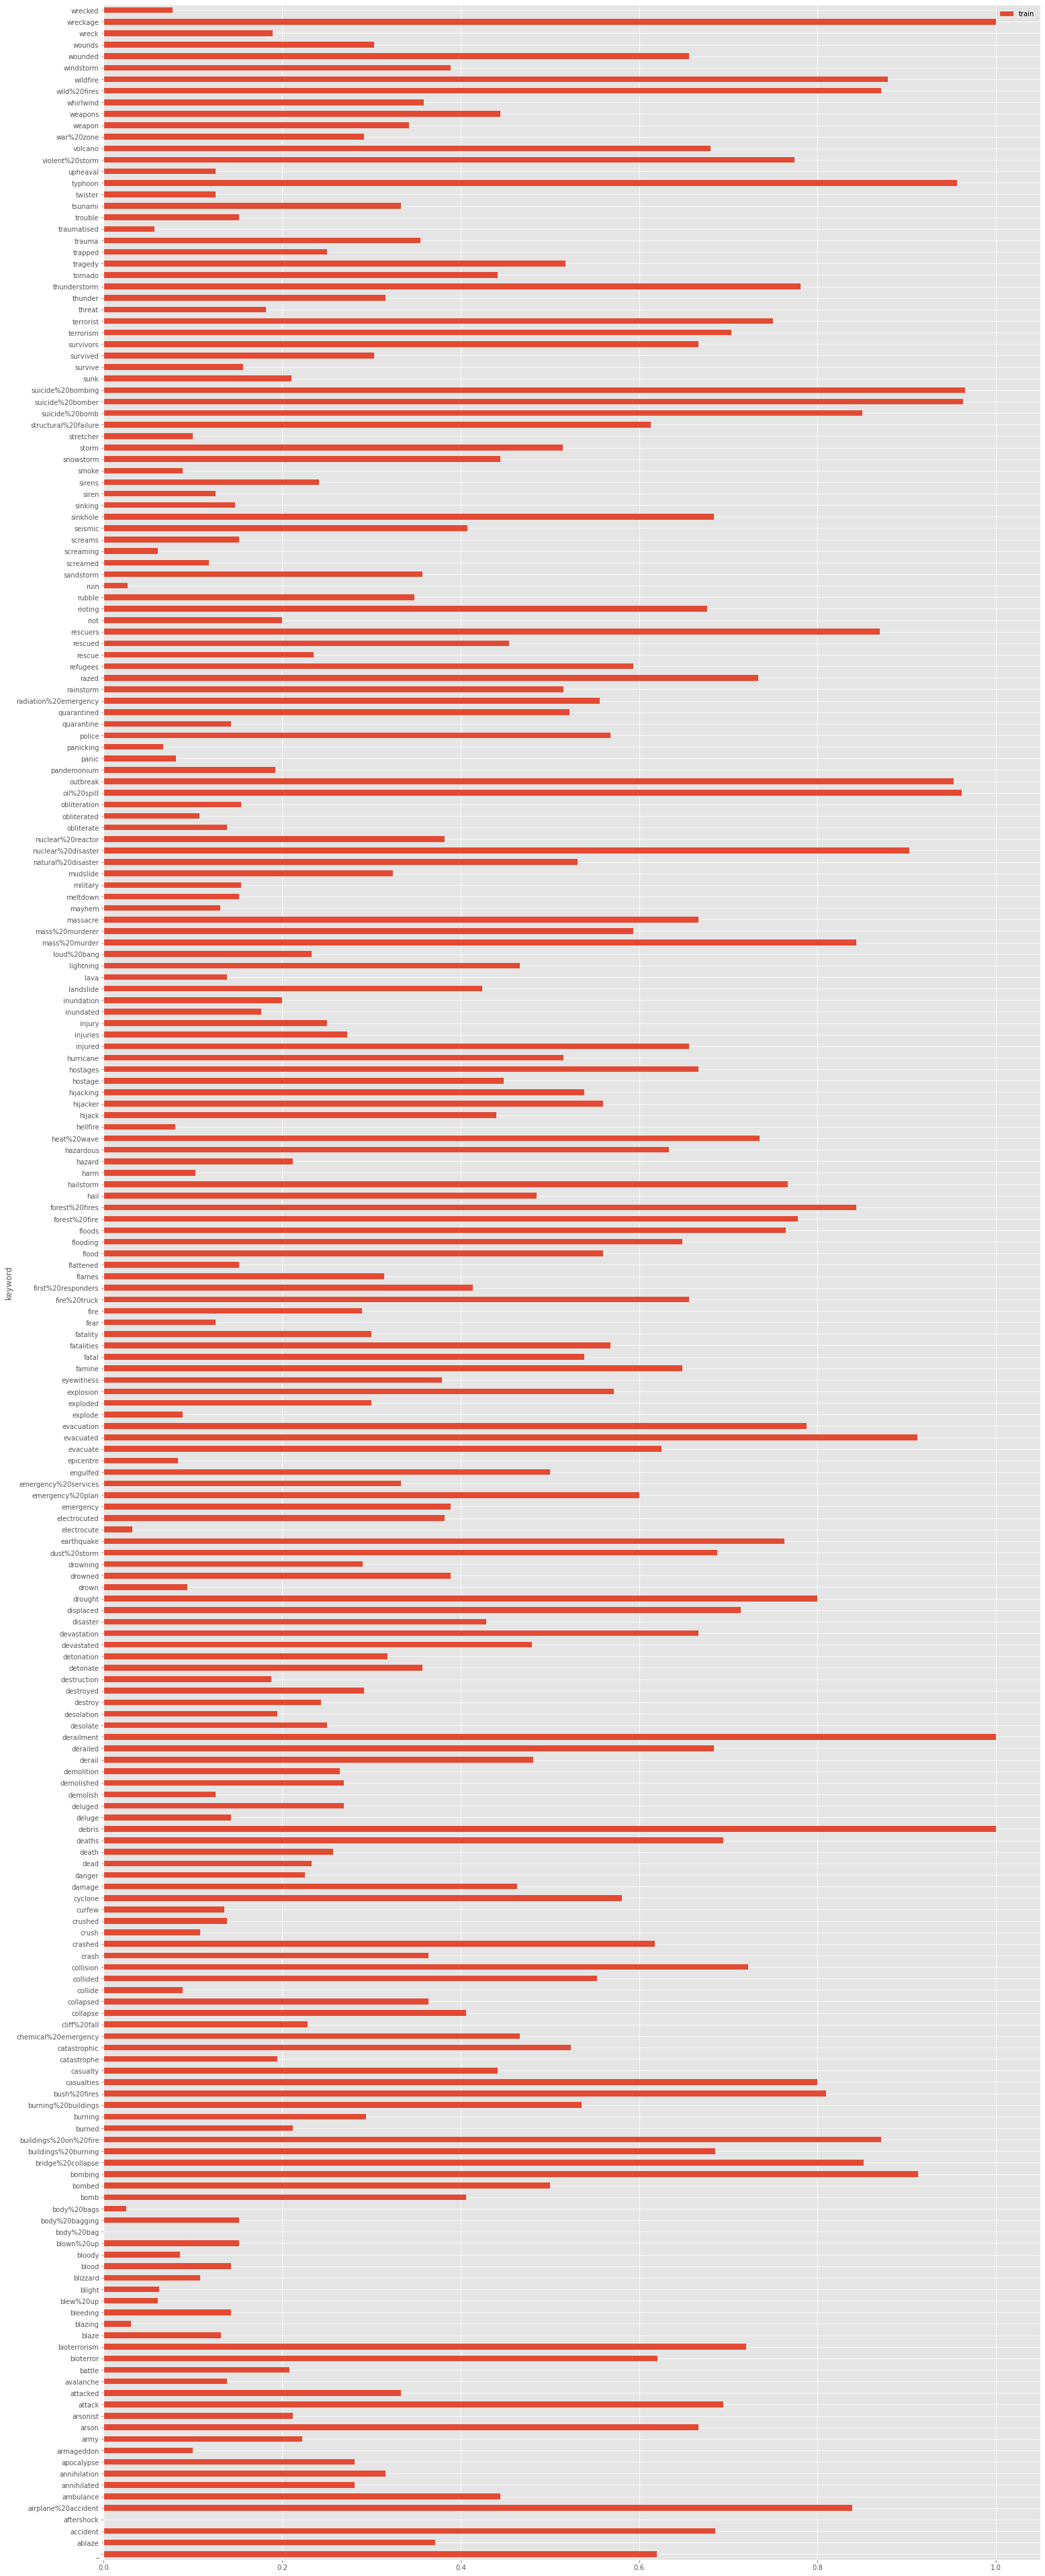

In [41]:
fig, ax = plt.subplots(figsize=(25, 70))
grouped_df.plot.barh(x='keyword', y='train', ax=ax)

* Some keywords are labelled in a unique way in the train set : aftershock, derailment, debris...
* Each group of tweets which share the same keyword does not follow the same proportion of labels : "ablaze" group is composed of 37% of disaster tweets while "accident" group is composed of 85% of disaster tweets in the training set.

This imbalance leaves us no choice but to **use pretrained embeddings**.

**Dummy model**

In [40]:
def dummy_classify(X_keywords_test):
    # Tweets are classified according to their associated keyword.
    # If the keyword is mainly used to describe disaster events, it will be classified as a disaster tweet (label 1).
    # Otherwise, it will be classified as 0.
    res = []
    for keyword in X_keywords_test:
        keyword = '_' if keyword is None else keyword
        pred = 0 if grouped_df[grouped_df['keyword'] == keyword]['train'].values[0] < 0.5 else 1
        res.append(pred)
    return np.array(res)

preds = dummy_classify(df[df['source'] == 'test']['keyword'])
truths = df[df['source'] == 'test']['target'].values
score = (preds == truths).astype(int).sum() / preds.shape[0]
print(f"Dummy model score : {score}")

Dummy model score : 0.7174379405455102


Restraining ourselves to the way keywords are labelled lead us to a accuracy of 0.7174.

## Embeddings

### GloVe

In [54]:
# Build an index for embeddings
embeddings_index = {}
EMBEDDINGS_PATH = '/datascience/embeddings'
EMBEDDINGS_LENGTH = 50
print('Reading lines')
with open(os.path.join(EMBEDDINGS_PATH, 'glove.6B.50d.txt'), encoding='utf-8') as f:
    lines = f.readlines()
    
def get_vocabulary(iter_sents):
    vocab = set()
    max_length = 0
    for text in iter_sents:
        tokens = text.split(' ')
        if len(tokens) > max_length:
            max_length = len(tokens)
        vocab.update(tokens)
    return vocab, max_length

_, max_length = get_vocabulary(df['clean_text'])
    
# Get tokenizer
print('Fit tokenizer')
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])

print('Extract embeddings')
for line in lines:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

print('Create embeddings matrix')
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDINGS_LENGTH))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Padding
print('Padding')
padded_seqs = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length,
                                                            padding='post', truncating='post')

Reading lines
Fit tokenizer
Extract embeddings
Create embeddings matrix
Padding


In [62]:
embedding_layer = tf.keras.layers.Embedding(input_dim=len(word_index)+1, output_dim=EMBEDDINGS_LENGTH, 
                                            input_length=max_length,
                                            weights=[embedding_matrix], trainable=False)

embeddings = embedding_layer(padded_seqs)
embedded_text = tf.reduce_mean(embeddings, axis=2)

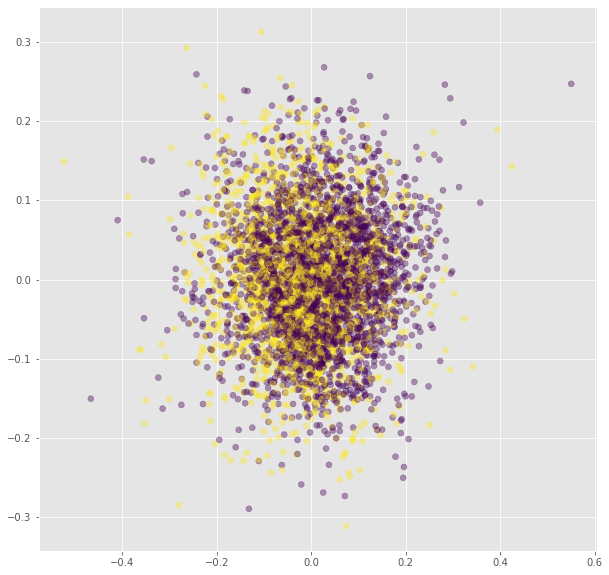

In [74]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
pca = PCA(2)
n = 5000
twodim = pca.fit_transform(embedded_text[:n])

ax.scatter(twodim[:,0], twodim[:,1], c=df['target'].values[:n], alpha=0.4)